In [2]:
import numpy as np
import matplotlib.pyplot as plt
import os

In [23]:
file_dir = "results/joint_meas_pd_plaq/"

d_list = [4,6,8] # list of code distance
Nrep = 28 # No. of repetitions for saving separate files

# loss_prob_list = np.linspace(0,0.3,5)
loss_prob_list = np.linspace(0.1,0.8,5)
loss_prob = 0.95 #loss_prob_list[2]
for i_d, d in enumerate(d_list):
    Nrep_saved = 0
    for i_rep in range(Nrep):
        fname = f"d_{d}_plaq_pl_{loss_prob:.2f}_r_{i_rep}.npz"
        if os.path.isfile(file_dir +fname):
            Nrep_saved += 1

            f1 = np.load(file_dir + fname)
            p_bulk_qubit_list = f1['arr_0'] 
            if i_rep ==0 and i_d == 0:
                logical_err_rate = np.zeros((len(d_list),len(p_bulk_qubit_list)))

            logical_err_rate[i_d, :] += f1['arr_1'] 
    print(f"{d}, {Nrep_saved}")
    logical_err_rate[i_d, :] /= Nrep_saved
print(logical_err_rate)

4, 28
6, 28
8, 28
[[0.02392857 0.12428571 0.25821429 0.3625     0.425      0.47857143
  0.48714286 0.46964286]
 [0.01357143 0.11607143 0.29642857 0.3925     0.46214286 0.49
  0.51321429 0.49285714]
 [0.00928571 0.12428571 0.31964286 0.44642857 0.49607143 0.49642857
  0.51928571 0.50357143]]


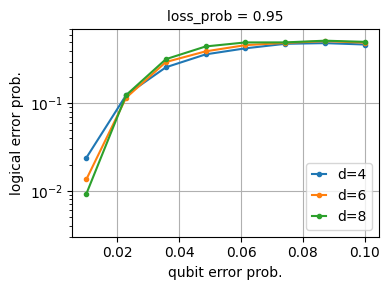

In [24]:
plt.figure(figsize=(4,3))
for i_d, d in enumerate(d_list):
    plt.plot(p_bulk_qubit_list,logical_err_rate[i_d,:],".-",label=f"d={d}")
plt.legend(handlelength=1)
plt.title(f"loss_prob = {loss_prob:.2f}", fontsize=10)
plt.ylim(3e-3,7e-1)
# plt.xscale("log")
plt.yscale("log")
plt.xlabel("Avg. ebit gen. time/qubit coherence time")
plt.xlabel("qubit error prob.")
plt.ylabel("logical error prob.")
plt.grid()
plt.tight_layout()
fig_dir = "figures/"
# plt.savefig(fig_dir + f"d_sweep_bw_{bandwidth}.pdf")
plt.show()

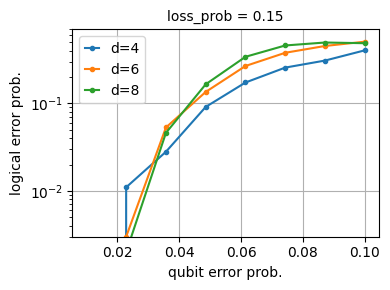

In [11]:
plt.figure(figsize=(4,3))
for i_d, d in enumerate(d_list):
    plt.plot(p_bulk_qubit_list,logical_err_rate[i_d,:],".-",label=f"d={d}")
plt.legend(handlelength=1)
plt.title(f"loss_prob = {loss_prob:.2f}", fontsize=10)
plt.ylim(3e-3,7e-1)
# plt.xscale("log")
plt.yscale("log")
plt.xlabel("Avg. ebit gen. time/qubit coherence time")
plt.xlabel("qubit error prob.")
plt.ylabel("logical error prob.")
plt.grid()
plt.tight_layout()
fig_dir = "figures/"
# plt.savefig(fig_dir + f"d_sweep_bw_{bandwidth}.pdf")
plt.show()

## No loss reference

In [17]:
file_dir = "results/joint_meas_pd/"

d_list = [4,6,8] # list of code distance
Nrep = 28*4 # No. of repetitions for saving separate files
loss_prob = 0
for i_d, d in enumerate(d_list):
    Nrep_saved = 0
    for i_rep in range(Nrep):
        fname = f"d_{d}_no_loss_r_{i_rep}.npz"
        if os.path.isfile(file_dir +fname):
            Nrep_saved += 1

            f1 = np.load(file_dir + fname)
            p_bulk_qubit_list = f1['arr_0'] 
            if i_rep ==0 and i_d == 0:
                logical_err_rate = np.zeros((len(d_list),len(p_bulk_qubit_list)))

            logical_err_rate[i_d, :] += f1['arr_1'] 
    print(f"{d}, {Nrep_saved}")
    logical_err_rate[i_d, :] /= Nrep_saved
print(logical_err_rate)

4, 112
6, 112
8, 112
[[1.07142857e-04 3.86607143e-03 2.15357143e-02 5.83660714e-02
  1.14410714e-01 1.88223214e-01 2.61508929e-01 3.26553571e-01]
 [0.00000000e+00 1.05357143e-03 1.39375000e-02 6.20625000e-02
  1.54133929e-01 2.70187500e-01 3.71830357e-01 4.36607143e-01]
 [0.00000000e+00 2.58928571e-04 9.30357143e-03 6.77678571e-02
  1.99223214e-01 3.47598214e-01 4.47080357e-01 4.86723214e-01]]


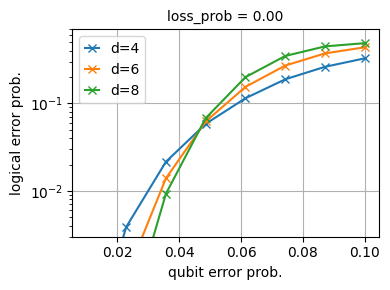

In [20]:
plt.figure(figsize=(4,3))
for i_d, d in enumerate(d_list):
    plt.plot(p_bulk_qubit_list,logical_err_rate[i_d,:],"x-",label=f"d={d}")
plt.legend(handlelength=1)
plt.title(f"loss_prob = {loss_prob:.2f}", fontsize=10)
plt.ylim(3e-3,7e-1)
# plt.xscale("log")
plt.yscale("log")
plt.xlabel("Avg. ebit gen. time/qubit coherence time")
plt.xlabel("qubit error prob.")
plt.ylabel("logical error prob.")
plt.grid()
plt.tight_layout()
fig_dir = "figures/"
# plt.savefig(fig_dir + f"d_sweep_bw_{bandwidth}.pdf")
plt.show()